Author Info

Student Name: Anay Patel

USC ID: 7758845053

## Part A

In [155]:
### Import Libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sb
from collections import OrderedDict
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

### Load Data

data_set_path = "vertebral_column_data/column_2C.dat"

var_set = [
    "pelvic_incidence",
    "pelvic_tilt",
    "lumbar_lordosis_angle",
    "sacral_slope",
    "pelvic_radius",
    "grade_of_spondylolisthesis"
]
head_set = []
head_set.extend(var_set)
head_set.append("clazz")

df = pd.read_table(data_set_path, names = head_set, sep = " ")

df.loc[df.clazz == "NO", 'clazz'] = 0
df.loc[df.clazz == "AB", 'clazz'] = 1

## Part B (i)

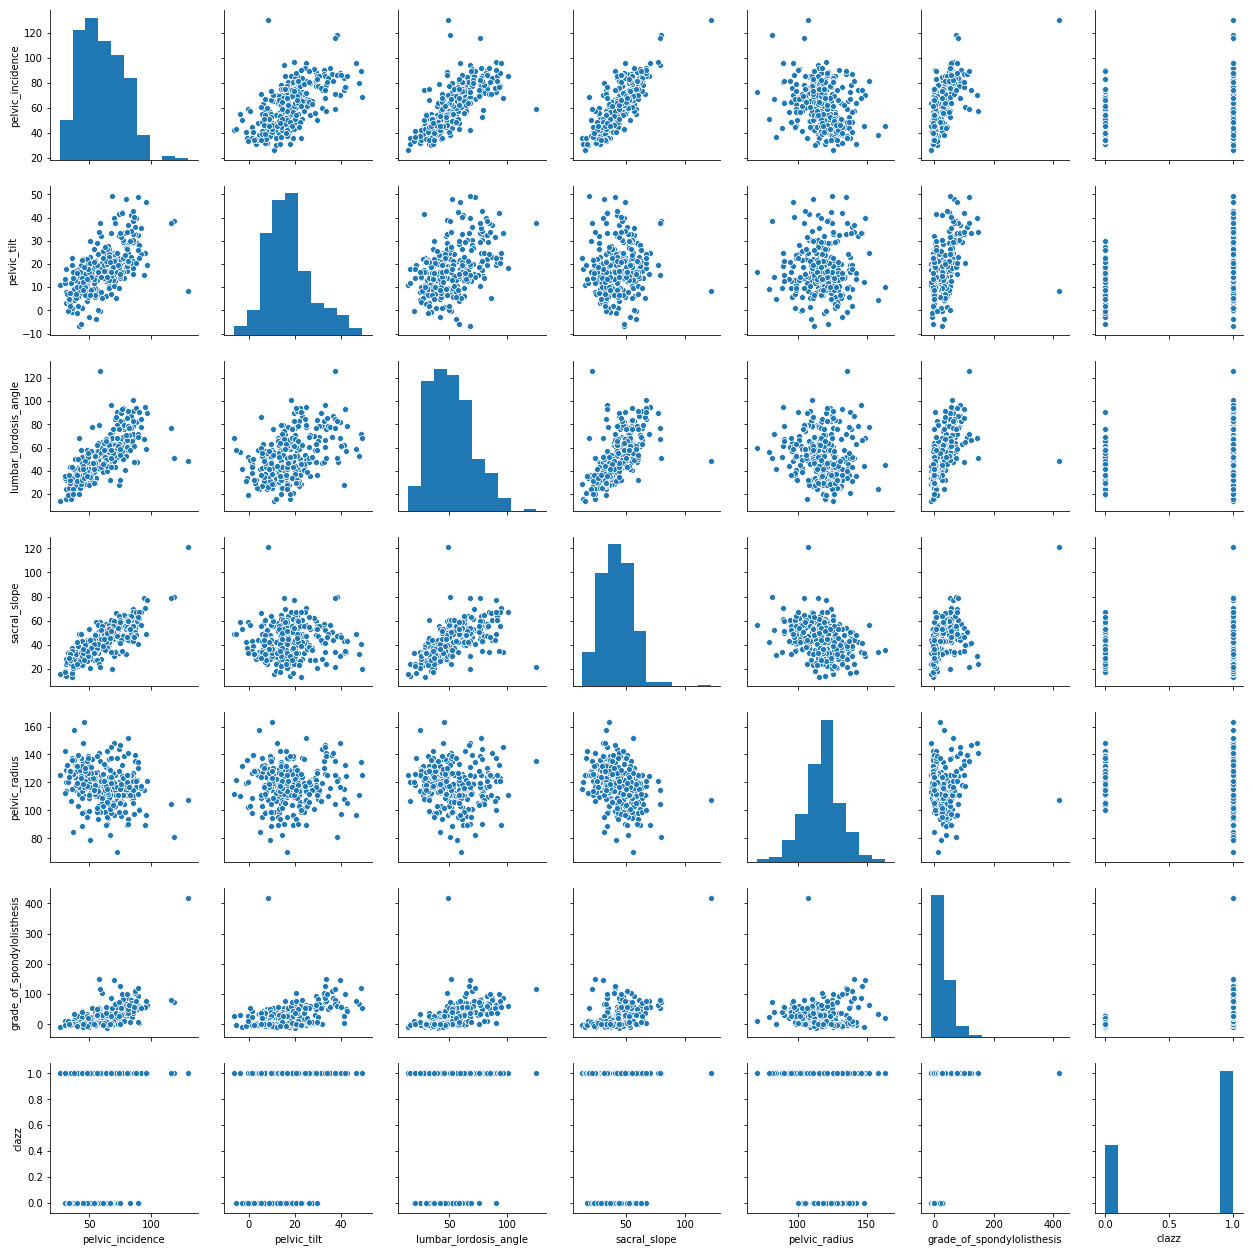

In [156]:
sb.pairplot(df)

## Part B (ii)

Text(0.5,1,'Class 0')

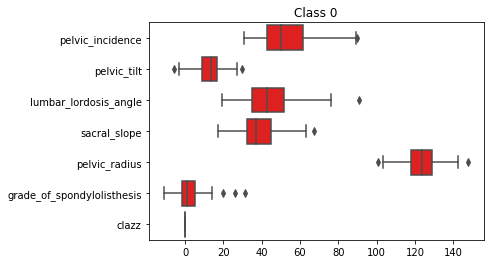

In [157]:
sb.boxplot(data = df[df['clazz'] == 0], orient = "h", color = 'r').set_title("Class 0")

Text(0.5,1,'Class 1')

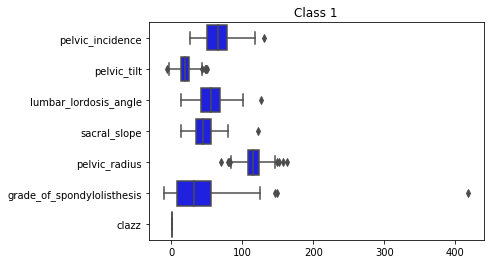

In [158]:
sb.boxplot(data = df[df['clazz'] == 1], orient = "h", color = 'b').set_title("Class 1")

# Part B (iii)

In [160]:
trn_0 = df[df['clazz'] == 0].head(70)

trn_1 = df[df['clazz'] == 1].head(140)

trn = trn_0.append(trn_1)

test = df.drop(trn.index.values)

## Part C (i) and (ii) 

Most suitable k:  4

Confusion matrix:
[[25  5]
 [ 1 69]]

True positive:  0.9857142857142858
True negative:  0.8333333333333334
Precision: , 0.9324324324324325
F score:  0.9583333333333333


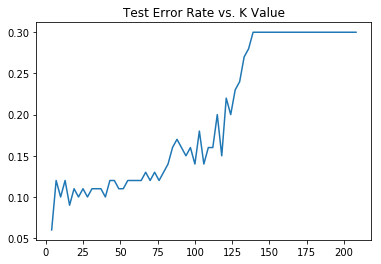

In [161]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
# take the training and test set values

X_test = test[var_set]
y_test = test['clazz']

X_trn = trn[var_set]
y_trn = trn['clazz']

# construct an ordered dictionary to store the results

result = OrderedDict(
[
    ("K", []),
    ("tr_error_rate", []),
    ("te_error_rate", []),
    ("tr_predict_clazzs", []),
    ("te_predict_clazzs", [])
])

# construct an array of the set of values of k that is to be chosen as K in KNN classifier
k_set = list(range(208,1,-3))

# loop over the k set of values to calculate and store the error and predictions
    # you can use sklearn.neighbors.KNeighborsClassifier to form the KNN classifier
    # fit the model using X as training data and y as target values
    
for k in k_set:
    # calculate training and test error rates using classifier.predict and classifier.accuracy_score functions
    # store the result as a dataframe
    
    classifier = KNeighborsClassifier(n_neighbors = k)
    classifier.fit(X_trn, y_trn)
        
    y_test_pred = classifier.predict(X_test)
    y_test_acc = metrics.accuracy_score(y_true = y_test, y_pred = y_test_pred)
        
    y_trn_pred = classifier.predict(X_trn)
    y_trn_acc = metrics.accuracy_score(y_true = y_trn, y_pred = y_trn_pred)
    
    result['K'].append(k)
    result['tr_error_rate'].append(1 - y_trn_acc)
    result['tr_predict_clazzs'].append(y_trn_pred)
    result['te_error_rate'].append(1 - y_test_acc)
    result['te_predict_clazzs'].append(y_test_pred)

result_df = pd.DataFrame(result, columns=result.keys())

plt.plot(result_df['K'], result_df['te_error_rate'])
plt.title('Test Error Rate vs. K Value')

# find the best K value by finding the K corresponding to minimum test error

k_val_ind = result_df['te_error_rate'].idxmin()

k_val = result_df.loc[k_val_ind]['K']

print('Most suitable k: ', k_val)

k_val_pred = result_df.loc[k_val_ind]['te_predict_clazzs']

cm = confusion_matrix(y_true = y_test, y_pred = k_val_pred)

TN = cm[0][0]
FN = cm[1][0]
TP = cm[1][1]
FP = cm[0][1]

# TPR
TPR = TP/(TP+FN)
# TNR
TNR = TN/(TN+FP) 
# Precision
P = TP/(TP+FP)
# F Score
F = f1_score(y_true = y_test, y_pred = k_val_pred)

print()
print("Confusion matrix:")
print(cm)
print()
print("True positive: ", TPR)
print("True negative: ", TNR)
print("Precision: ,", P)
print("F score: ", F)

# Part C (iii)

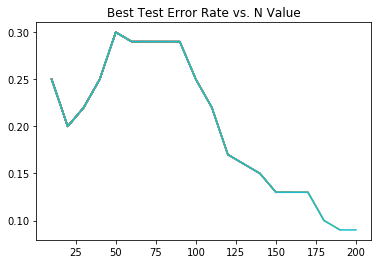

In [162]:
# best test error rate vs N plot is the learning curve

# generate the training set classes and training subset array as mentionned

N_set = list(range(10,210,10))

N_result = OrderedDict(
[
    ("N", []),
    ("best_te_error_rate", []),
])

# loop over the training subset
for N in N_set:
    
    # choose the N/3 and the N - N/3 classes in the training set
    trn_n0 = trn[trn['clazz'] == 0].head(N // 3)
    trn_n1 = trn[trn['clazz'] == 1].head(N - (N // 3))
    
    trn_n = trn_n0.append(trn_n1)
    
    X_test_n = test[var_set]
    y_test_n = test['clazz']

    X_trn_n = trn_n[var_set]
    y_trn_n = trn_n['clazz']

    # create new k_set and test sets for these training subsets
    k_set_lc = list(range(1,N,5))
    
    # store the result in an ordered dictionary:
    result_lc = OrderedDict(
    [
    ("K", []),
    ("te_error_rate", []),
    ])
    
    # loop over the k_set to find the test accuracy_score and error
    for k in k_set_lc:
        # you can use sklearn.neighbors.KNeighborsClassifier to form the KNN classifier
        # fit the model using X as training data and y as target values
        # Calculate training and test error rates using classifier.predict and classifier.accuracy_score functions

        classifier = KNeighborsClassifier(n_neighbors = k)
        classifier.fit(X_trn_n, y_trn_n)
        
        y_trn_pred_n = classifier.predict(X_trn_n)
        y_trn_acc_n = metrics.accuracy_score(y_true = y_trn_n, y_pred = y_trn_pred_n)
        
        y_test_pred_n = classifier.predict(X_test_n)
        y_test_acc_n = metrics.accuracy_score(y_true = y_test_n, y_pred = y_test_pred_n)

        # Store the results as a dataframe
        result_lc['K'].append(k)
        result_lc['te_error_rate'].append(1 - y_test_acc_n)
    
    result_lc_df = pd.DataFrame(result_lc, columns=result_lc.keys())
    
    k_val_ind_n = result_lc_df['te_error_rate'].idxmin()
    best_err_rate = result_lc_df.loc[k_val_ind_n]['te_error_rate']
        
    N_result['N'].append(N)
    N_result['best_te_error_rate'].append(best_err_rate)
    
    N_result_df = pd.DataFrame(N_result, columns=N_result.keys())
    
    plt.plot(N_result_df['N'], N_result_df['best_te_error_rate'])
    plt.title('Best Test Error Rate vs. N Value')

## Part D

In [163]:
def find_best_k_and_te_err_rate(
    X_test,
    y_test,
    metric='minkowski',
    p=2,
    weights='uniform',
    metric_params=None,
    k_set=[k for k in range(1,197,5)]
):
    
    result = OrderedDict([
        ("K", []),
        ("te_error_rate", []),
        ("f_score", []),
        ("recall", [])
    ])
    
    # construct an array of the set of values of k that is to be chosen as K in KNN classifier
    
    # Loop over the k set of values to calculate and store the error and predictions
    for k in k_set:
        # you can use sklearn.neighbors.KNeighborsCassifier to form the KNN classifier
        # Fit the model using X as training data and y as target values
        classifier = KNeighborsClassifier(n_neighbors = k, metric = metric, weights = weights, p = p, metric_params = metric_params)
        classifier.fit(X_trn, y_trn)

        # Calculate training and test error rates using classifier.predict and classifier.accuracy_score functions
        # Store the result as a dataframe
        
        y_test_pred = classifier.predict(X_test)
        y_test_acc = metrics.accuracy_score(y_true = y_test, y_pred = y_test_pred)

        result['K'].append(k)
        result['te_error_rate'].append(1 - y_test_acc)
        result['f_score'].append(f1_score(y_true = y_test, y_pred = y_test_pred))
        
        cm = confusion_matrix(y_true = y_test, y_pred = y_test_pred)

        TN = cm[0][0]
        FN = cm[1][0]
        TP = cm[1][1]
        FP = cm[0][1]
        
        result['recall'].append(TP/(TP+FN))
        
        
    # best_te_err_rate is the minimum value
    result_df = pd.DataFrame(result, columns=result.keys())

    # find the best K value by finding the K corresponding to minimum test error
    
    sorted_result = result_df.sort_values(by = ['te_error_rate', 'f_score', 'recall', 'K'], ascending = [True, True, False, False])
    sorted_result.reset_index(inplace=True)
    
    best_k = sorted_result.loc[0]['K']
    best_te_err_rate = sorted_result.loc[0]['te_error_rate']
        
    return best_k, best_te_err_rate, result_df

minkowski_best_k, minkowski_best_te_err_rate, minkowski_result_df = find_best_k_and_te_err_rate(X_test, y_test)

print("Minkowski")
print("Best K: ", minkowski_best_k)
print("Best TE ERR Rate: ", minkowski_best_te_err_rate)

print(minkowski_result_df)
print()

manhattan_best_k, manhattan_best_te_err_rate, manhattan_result_df = find_best_k_and_te_err_rate(X_test, y_test, metric = 'manhattan')

print("Manhattan")
print("Best K: ", manhattan_best_k)
print("Best TE ERR Rate: ", manhattan_best_te_err_rate)

print(manhattan_result_df)
print()

chebyshev_best_k, chebyshev_best_te_err_rate, chebyshev_result_df = find_best_k_and_te_err_rate(X_test, y_test, metric = 'chebyshev')

print("Chebyshev")
print("Best K: ", chebyshev_best_k)
print("Best TE ERR Rate: ", chebyshev_best_te_err_rate)

print(chebyshev_result_df)
print()

X_trn_cov = np.cov(X_trn, rowvar=False)

mahalanobis_best_k, mahalanobis_best_te_err_rate, mahalanobis_result_df = find_best_k_and_te_err_rate(X_test, y_test, metric = 'mahalanobis', metric_params={'V': X_trn_cov})

print("Mahalanobis")
print("Best K: ", mahalanobis_best_k)
print("Best TE ERR Rate: ", mahalanobis_best_te_err_rate)

print(mahalanobis_result_df)


Minkowski
Best K:  6.0
Best TE ERR Rate:  0.07999999999999996
      K  te_error_rate   f_score    recall
0     1           0.13  0.911565  0.957143
1     6           0.08  0.945946  1.000000
2    11           0.12  0.921053  1.000000
3    16           0.09  0.939597  1.000000
4    21           0.10  0.932432  0.985714
5    26           0.11  0.926174  0.985714
6    31           0.11  0.926174  0.985714
7    36           0.11  0.926174  0.985714
8    41           0.11  0.926174  0.985714
9    46           0.12  0.918919  0.971429
10   51           0.11  0.926174  0.985714
11   56           0.12  0.920000  0.985714
12   61           0.12  0.920000  0.985714
13   66           0.13  0.913907  0.985714
14   71           0.13  0.913907  0.985714
15   76           0.12  0.920000  0.985714
16   81           0.13  0.913907  0.985714
17   86           0.16  0.894737  0.971429
18   91           0.16  0.896104  0.985714
19   96           0.15  0.901961  0.985714
20  101           0.17  0.891720  1

## Part E

In [164]:
euclidean_best_k, euclidean_best_te_err_rate, euclidean_result_df = find_best_k_and_te_err_rate(X_test, y_test, weights = 'distance')

print("Euclidean")
print("Best K: ", euclidean_best_k)
print("Best TE ERR Rate: ", euclidean_best_te_err_rate)

print(euclidean_result_df)
print()

manhattan_best_k, manhattan_best_te_err_rate, manhattan_result_df = find_best_k_and_te_err_rate(X_test, y_test, metric = 'manhattan')

print("Manhattan")
print("Best K: ", manhattan_best_k)
print("Best TE ERR Rate: ", manhattan_best_te_err_rate)

print(manhattan_result_df)
print()

chebyshev_best_k, chebyshev_best_te_err_rate, chebyshev_result_df = find_best_k_and_te_err_rate(X_test, y_test, metric = 'chebyshev')

print("Chebyshev")
print("Best K: ", chebyshev_best_k)
print("Best TE ERR Rate: ", chebyshev_best_te_err_rate)

print(chebyshev_result_df)
print()

Euclidean
Best K:  6.0
Best TE ERR Rate:  0.09999999999999998
      K  te_error_rate   f_score    recall
0     1           0.13  0.911565  0.957143
1     6           0.10  0.933333  1.000000
2    11           0.12  0.921053  1.000000
3    16           0.11  0.927152  1.000000
4    21           0.11  0.926174  0.985714
5    26           0.11  0.926174  0.985714
6    31           0.11  0.926174  0.985714
7    36           0.11  0.926174  0.985714
8    41           0.11  0.926174  0.985714
9    46           0.11  0.926174  0.985714
10   51           0.11  0.926174  0.985714
11   56           0.11  0.926174  0.985714
12   61           0.11  0.926174  0.985714
13   66           0.11  0.926174  0.985714
14   71           0.11  0.926174  0.985714
15   76           0.12  0.920000  0.985714
16   81           0.13  0.913907  0.985714
17   86           0.13  0.913907  0.985714
18   91           0.14  0.907895  0.985714
19   96           0.14  0.907895  0.985714
20  101           0.12  0.921053  1

## Part F

The lowest training error rate achieved was 0.0, though this was done so through overfitting.